In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

Empty line imputation:

In [2]:
prefix = "/Users/dmitriismirnov/Dropbox/Projects/optimalTAD/Results/Li_2015/New/Imputation/"

In [3]:
ampl = pd.read_csv(prefix + "amplitudes.csv")

In [4]:
ampl.columns = ['Gamma', 'BEAF-32 Rep2', 'CBP Rep2', 'CBP Rep1', 'CBP Rep3', 'CP190 Rep2', 
                    'CTCF Rep2', 'CapH2 Rep2', 'CapH2 Rep1', 'Chromator Rep2', 'Chromator Rep1', 'Fs1h.L Rep1', 
                    'H3K4me1 Rep2', 'H3K4me3 Rep2', 'H3K9me2 Rep1', 'L(3)mbt Rep1', 'Pc-RJ Rep1', 
                    'Pc-VP Rep1', 'RNAPII Rep1', 'Rad21 Rep2', 'Rad21 Rep1', 
                    'Rad21 Rep3', 
                    'TFIIIC Rep2', 
                    'TFIIIC Rep1', 'Z4 Rep1']

In [5]:
empLineImp = np.array([])
p = ampl[100:]
for column in p.columns:
    ind = np.argmax(p[[column]].values)
    opt_gamma = p[['Gamma']].values[ind]
    empLineImp = np.append(empLineImp, opt_gamma[0])

No empty line imputation

In [6]:
prefix = "/Users/dmitriismirnov/Dropbox/Projects/optimalTAD/Results/Li_2015/New/No imputation/"

In [7]:
ampl_noimp = pd.read_csv(prefix + "amplitudes.csv")

In [8]:
ampl_noimp.columns = ['Gamma', 'BEAF-32 Rep2', 'CBP Rep2', 'CBP Rep1', 'CBP Rep3', 'CP190 Rep2', 
                    'CTCF Rep2', 'CapH2 Rep2', 'CapH2 Rep1', 'Chromator Rep2', 'Chromator Rep1', 'Fs1h.L Rep1', 
                    'H3K4me1 Rep2', 'H3K4me3 Rep2', 'H3K9me2 Rep1', 'L(3)mbt Rep1', 'Pc-RJ Rep1', 
                    'Pc-VP Rep1', 'RNAPII Rep1', 'Rad21 Rep2', 'Rad21 Rep1', 
                    'Rad21 Rep3', 
                    'TFIIIC Rep2', 
                    'TFIIIC Rep1', 'Z4 Rep1']

In [9]:
noEmpLineImp = np.array([])

p = ampl_noimp[100:]
for column in p.columns:
    ind = np.argmax(p[[column]].values)
    opt_gamma = p[['Gamma']].values[ind]
    noEmpLineImp = np.append(noEmpLineImp, opt_gamma[0])

Visualization

In [11]:
df1 = pd.DataFrame({'Gamma': noEmpLineImp[1:], 'Type': 'No imputation'})
df2 = pd.DataFrame({'Gamma': empLineImp[1:], 'Type': 'Imputation'})

In [12]:
df = pd.concat([df1, df2])

Text(0.5, 42.0, '')

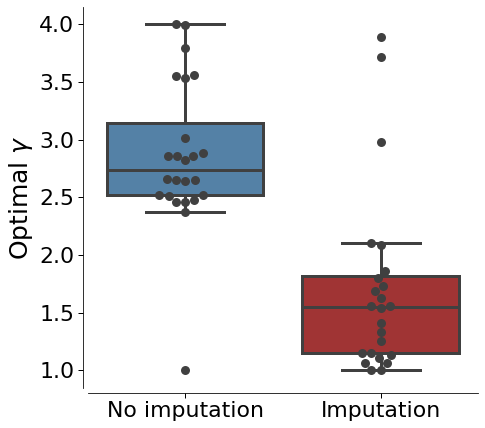

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.set_context("paper", font_scale=2.5)

my_pal = {"No imputation": "steelblue", "Imputation": "firebrick"}
sns.boxplot(x = "Type", y="Gamma", data=df, showfliers=False, palette=my_pal, linewidth = 3)
sns.swarmplot(x = "Type", y="Gamma", data=df, color=".25", size = 9)
sns.despine(offset=5, trim=False)
plt.ylabel(r'Optimal $\gamma$', fontsize = 25, labelpad = 4)
plt.xlabel('')